## Objective

#### The intent of the project was to study the effects of aging versus smoking on deaths caused by coronary artery disease, as pertaining to doctors.

## Description of the data set

#### The data set, breslow.csv was loaded from https://vincentarelbundock.github.io/Rdatasets/datasets.html. The data set has few records since data for several doctors were summed up for every age group. The data frame contains the following columns-
#### age- The mid-point of the 10 year age-group for the doctors.
#### smoke- An indicator of whether the doctors smoked (1) or not (0).
#### n- The number of person-years in the category.
#### y- The number of deaths attributed to coronary artery disease.
#### ns- The number of smoker years in the category (smoke*n).

## Methodology

### Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import requests
import io
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
print('Libraries imported.')

Libraries imported.


### Load the dataset and wrangle the data

In [2]:
# For accesing the file locally, add an additional backslash before file name to eliminate a bug as in 
'C:\\Users\galax\Data_Sets\\breslow.csv'

# Access the raw data set that was uploaded to a github repository
url= 'https://raw.githubusercontent.com/SR2000/Data_Sets/master/breslow.csv'
s= requests.get(url).content
df= pd.read_csv(io.StringIO(s.decode('utf-8')))

df

,Unnamed: 0,age,smoke,n,y,ns
0,1,40,0,18790,2,0
1,2,50,0,10673,12,0
2,3,60,0,5710,28,0
3,4,70,0,2585,28,0
4,5,80,0,1462,31,0
5,6,40,1,52407,32,52407
6,7,50,1,43248,104,43248
7,8,60,1,28612,206,28612
8,9,70,1,12663,186,12663
9,10,80,1,5317,102,5317


In [3]:
# Drop the first column and reset the index
df= df.drop('Unnamed: 0',axis=1)
df.reset_index(drop=True,inplace=True)
df

,age,smoke,n,y,ns
0,40,0,18790,2,0
1,50,0,10673,12,0
2,60,0,5710,28,0
3,70,0,2585,28,0
4,80,0,1462,31,0
5,40,1,52407,32,52407
6,50,1,43248,104,43248
7,60,1,28612,206,28612
8,70,1,12663,186,12663
9,80,1,5317,102,5317


In [4]:
# Rename the columns to descriptive names
df.rename(columns= {'age':'Age','smoke':'Smoke','n':'Person-years','y':'Coronary_artery_disease_deaths','ns':'Smoking-years'},inplace=True)
df

,Age,Smoke,Person-years,Coronary_artery_disease_deaths,Smoking-years
0,40,0,18790,2,0
1,50,0,10673,12,0
2,60,0,5710,28,0
3,70,0,2585,28,0
4,80,0,1462,31,0
5,40,1,52407,32,52407
6,50,1,43248,104,43248
7,60,1,28612,206,28612
8,70,1,12663,186,12663
9,80,1,5317,102,5317


In [5]:
# Check the data types of the columns
df.dtypes

Age                               int64
Smoke                             int64
Person-years                      int64
Coronary_artery_disease_deaths    int64
Smoking-years                     int64
dtype: object

In [6]:
# Modify the 'Smoke' column to categorical since it contains indicators
df['Smoke']= pd.Categorical(df['Smoke'])
df.dtypes

Age                                  int64
Smoke                             category
Person-years                         int64
Coronary_artery_disease_deaths       int64
Smoking-years                        int64
dtype: object

#### Person-years (Smoking- years for smokers) was assumed to contain the sum of all the years for all individuals in each age group. From the data, it was clear that the number of sampled doctors varied in every age group. Rather than look at the individuals, it was decided to look at the number of deaths for 40 person-years since in this case, the deaths will be compared at the same scale. 40 was used since it was the midpoint for the youngest age group.

In [7]:
# Create a new column that contains the number of deaths per 40 person-years
df['Deaths_per_40_person-years']= df['Coronary_artery_disease_deaths']*40/df['Person-years']
df

,Age,Smoke,Person-years,Coronary_artery_disease_deaths,Smoking-years,Deaths_per_40_person-years
0,40,0,18790,2,0,0.004258
1,50,0,10673,12,0,0.044973
2,60,0,5710,28,0,0.196147
3,70,0,2585,28,0,0.433269
4,80,0,1462,31,0,0.848153
5,40,1,52407,32,52407,0.024424
6,50,1,43248,104,43248,0.096189
7,60,1,28612,206,28612,0.287991
8,70,1,12663,186,12663,0.587538
9,80,1,5317,102,5317,0.767350


### Exploratory Data Analysis

#### Statistical values for the data set were extracted.

In [8]:
df.describe()

,Age,Person-years,Coronary_artery_disease_deaths,Smoking-years,Deaths_per_40_person-years
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,60.00000,18146.700000,73.100000,14224.700000,0.329029
std,14.90712,17762.398937,73.421841,20002.030047,0.314786
min,40.00000,1462.000000,2.000000,0.000000,0.004258
25%,50.00000,5415.250000,28.000000,0.000000,0.057777
50%,60.00000,11668.000000,31.500000,2658.500000,0.242069
75%,70.00000,26156.500000,103.500000,24624.750000,0.548971
max,80.00000,52407.000000,206.000000,52407.000000,0.848153


#### A line plot was created to compare the data for doctors who are smokers with those who are not.

Text(0.5, 1.0, 'Coronary Artery Disease Deaths vs. Age')

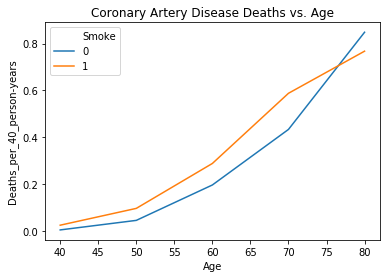

In [9]:
#Create a line plot to look at the relationship between deaths and age for smokers and non-smokers
sns.lineplot(x='Age',y='Deaths_per_40_person-years',hue='Smoke',data= df)
ax= plt.gca()
ax.set_title('Coronary Artery Disease Deaths vs. Age')

#### The plot clearly showed that age and deaths have a similar relationship for doctors who smoke and those who do not. This finding can be corroborated by fitting the data to a model.

## The Model

#### A linear regression model was used to determine the best fit for the data. Correlation plots for smokers and non-smokers were first created to determine the trend and the strength of the correlation.

(-0.5778719842948267, 0.9319584723353357)

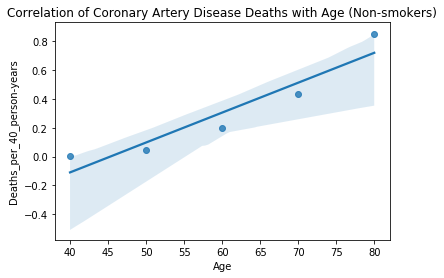

In [10]:
# Plot the correlation of deaths/40 person-years, with age for non-smokers
sns.regplot(x='Age',y='Deaths_per_40_person-years',data= df[df['Smoke']==0])
ax= plt.gca()
ax.set_title('Correlation of Coronary Artery Disease Deaths with Age (Non-smokers)')
plt.ylim()

(-0.24222176475428991, 0.8765631719835141)

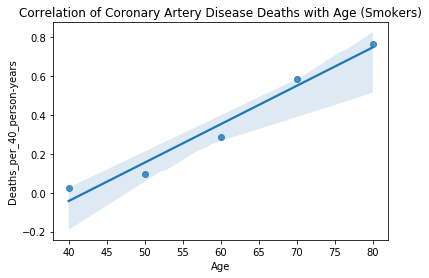

In [11]:
# Plot the correlation of deaths/40 person-years, with age for smokers
sns.regplot(x='Age',y='Deaths_per_40_person-years',data= df[df['Smoke']==1])
ax=plt.gca()
ax.set_title('Correlation of Coronary Artery Disease Deaths with Age (Smokers)')
plt.ylim()

#### The two plots above showed that deaths were positively correlated with age for doctors who smoke and those who do not. The correlation coefficients were very high in both cases- 0.9320 for non-smokers and 0.8766 for smokers.

In [12]:
# Set up the linear regression model
lr= LinearRegression()
X= df[['Age','Smoking-years']]
Y= df['Deaths_per_40_person-years']

In [13]:
# Fit the model to the data and calculate R-squared
lm= LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.9264955128383805

In [14]:
# Use the model to predict the Y-values from the X-values and confirm them by validating on the correlation plots
lm.predict(X)

array([-0.11113251,  0.09966998,  0.31047247,  0.52127497,  0.73207746,
       -0.04276489,  0.15608922,  0.3477983 ,  0.5377945 ,  0.73901376])

#### The R-squared value for the model was 0.9265 indicating that most of the variation in deaths was explained by the variation in age.

## Results and Conclusions

#### The study showed that age was positively correlated with coronary artery deaths for doctors who smoke and those who do not. The correlation coefficients were very high in both cases. On fitting the data to a linear regression model, the R-squared value for the model was 0.9265 indicating a strong fit. Based on the data set, it was concluded that age and not smoking increases the risk of coronary artery disease in doctors.